<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jupyter Notebook created by Uygar Aras for IE423 Task 6 on Segmentation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import scale

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/black_friday/train.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values in product categories
imputer = SimpleImputer(strategy='most_frequent')
df[['Product_Category_2', 'Product_Category_3']] = imputer.fit_transform(df[['Product_Category_2', 'Product_Category_3']])

# Convert categorical variables to numerical ones using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop(columns=['User_ID', 'Product_ID', 'Purchase']))

In [ ]:
from sklearn.cluster import KMeans

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42,n_init='auto')  # Using 5 clusters for segmentation
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows of the dataset with cluster labels
df_encoded.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Cluster
0,1000001,P00069042,10,0,3,8.0,16.0,8370,True,False,...,False,True,False,False,False,False,True,False,False,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,True,False,...,False,True,False,False,False,False,True,False,False,0
2,1000001,P00087842,10,0,12,8.0,16.0,1422,True,False,...,False,True,False,False,False,False,True,False,False,0
3,1000001,P00085442,10,0,12,14.0,16.0,1057,True,False,...,False,True,False,False,False,False,True,False,False,0
4,1000002,P00285442,16,0,8,8.0,16.0,7969,False,True,...,True,False,False,True,False,False,False,False,True,2


In [ ]:
# Analyze the distribution of key variables across clusters

# Gender distribution per cluster
gender_distribution = df_encoded.groupby('Cluster')[['Gender_F', 'Gender_M']].mean()

# Age distribution per cluster
age_distribution = df_encoded.groupby('Cluster')[['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']].mean()

# Occupation distribution per cluster
occupation_distribution = df_encoded.groupby('Cluster')['Occupation'].mean()

# City category distribution per cluster
city_category_distribution = df_encoded.groupby('Cluster')[['City_Category_A', 'City_Category_B', 'City_Category_C']].mean()

# Marital status distribution per cluster
marital_status_distribution = df_encoded.groupby('Cluster')['Marital_Status'].mean()

# Average purchase amount per cluster
average_purchase_per_cluster = df_encoded.groupby('Cluster')['Purchase'].mean()

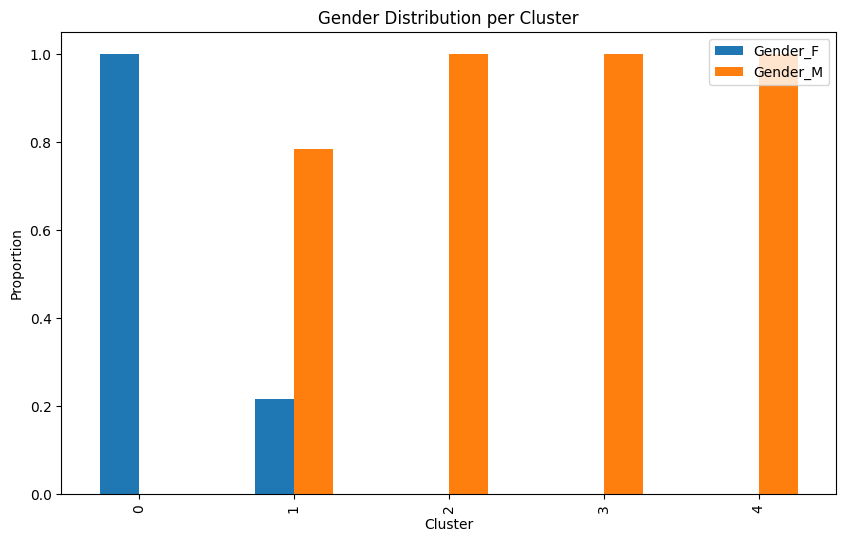

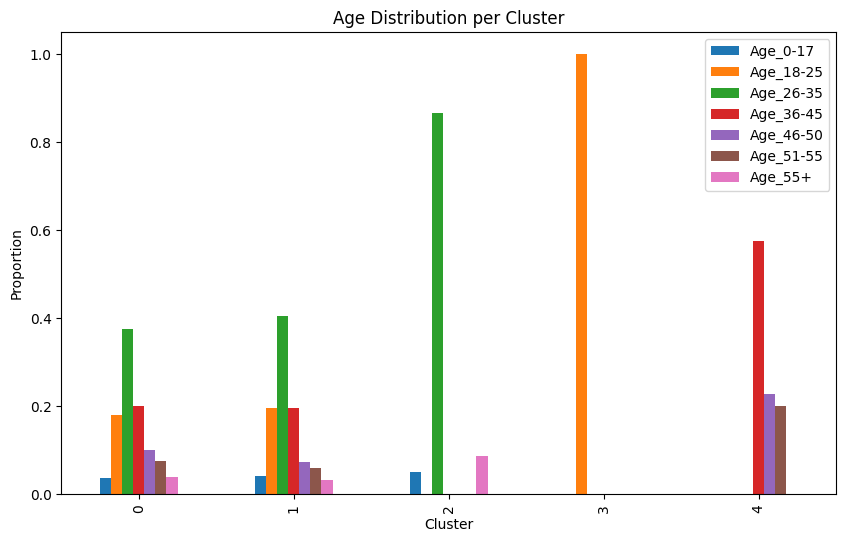

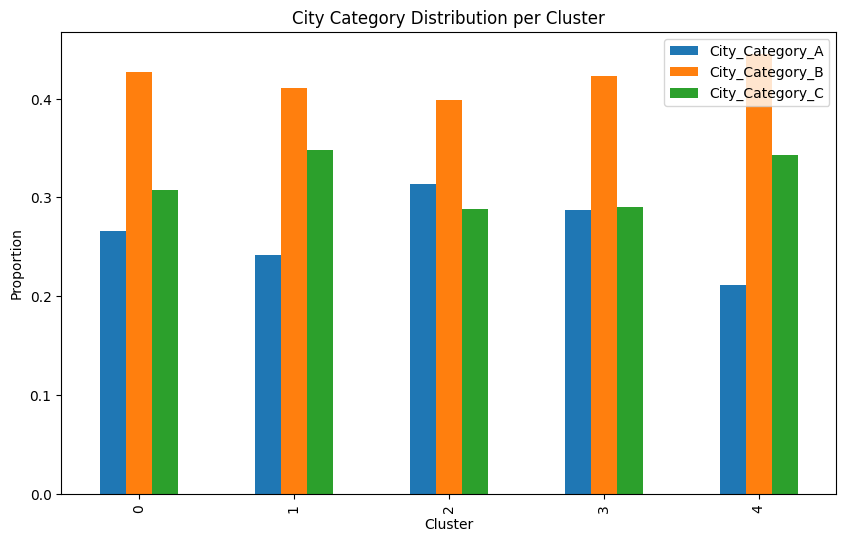

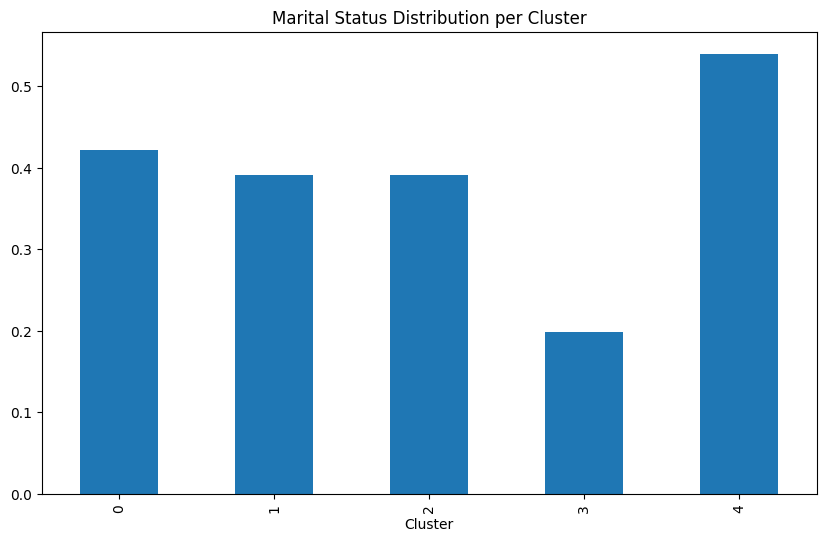

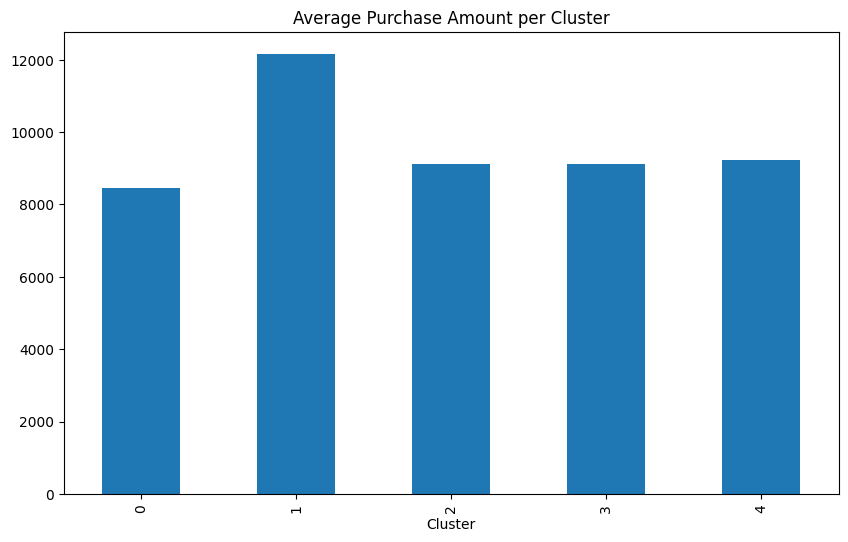

In [ ]:
import matplotlib.pyplot as plt

# Function to plot distributions
def plot_distribution(df, title):
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Proportion')
    plt.xlabel('Cluster')
    plt.show()

# Plotting the distributions
plot_distribution(gender_distribution, "Gender Distribution per Cluster")
plot_distribution(age_distribution, "Age Distribution per Cluster")
plot_distribution(city_category_distribution, "City Category Distribution per Cluster")
marital_status_distribution.plot(kind='bar', figsize=(10, 6), title="Marital Status Distribution per Cluster")
plt.show()
average_purchase_per_cluster.plot(kind='bar', figsize=(10, 6), title="Average Purchase Amount per Cluster")
plt.show()

Analysis for Cluster 0:

Gender Distribution:
Gender_F    1.0
Gender_M    0.0
dtype: float64
Conclusion: This cluster is predominantly female.

Age Distribution:
Age_0-17     0.035594
Age_18-25    0.178778
Age_26-35    0.375185
Age_36-45    0.199548
Age_46-50    0.098551
Age_51-55    0.074145
Age_55+      0.038199
dtype: float64
Conclusion: This cluster is predominantly in the 26-35 age group.

Average Occupation Code: 6.727338112248567
Conclusion: This cluster has an average occupation code of 6.727338112248567

City Category Distribution:
City_Category_A    0.265661
City_Category_B    0.426690
City_Category_C    0.307649
dtype: float64
Conclusion: This cluster predominantly belongs to City Category B.

Average Marital Status (0=Single, 1=Married): 0.4220469420536549
Conclusion: This cluster is predominantly single.

Average Purchase Amount: 8444.122749394644
Conclusion: This cluster has an average purchase amount of 8444.122749394644


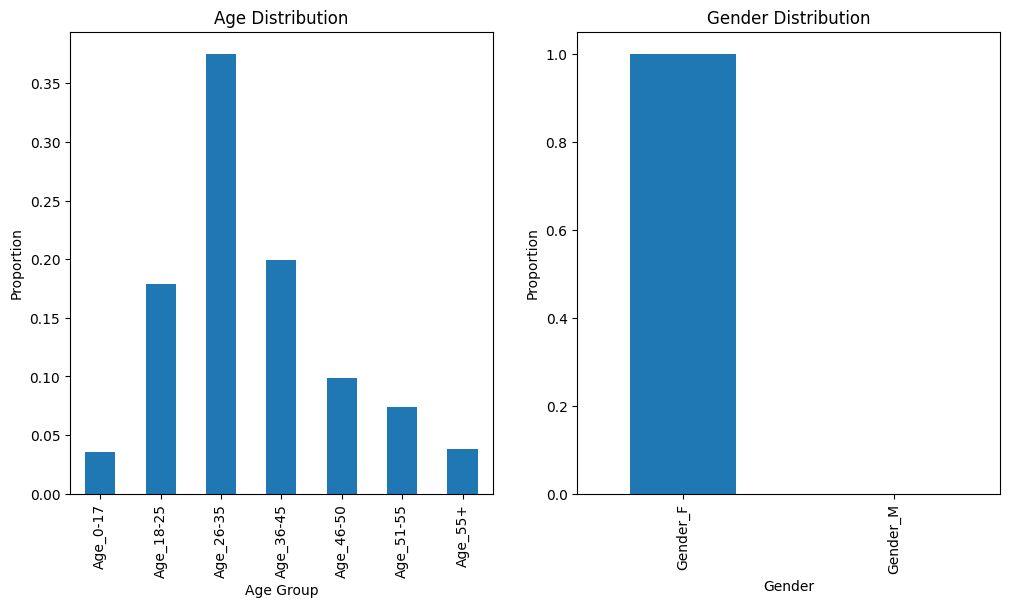

Analysis for Cluster 1:

Gender Distribution:
Gender_F    0.216582
Gender_M    0.783418
dtype: float64
Conclusion: This cluster is predominantly male.

Age Distribution:
Age_0-17     0.041487
Age_18-25    0.194105
Age_26-35    0.404885
Age_36-45    0.195261
Age_46-50    0.072647
Age_51-55    0.059400
Age_55+      0.032216
dtype: float64
Conclusion: This cluster is predominantly in the 26-35 age group.

Average Occupation Code: 8.151441381129166
Conclusion: This cluster has an average occupation code of 8.151441381129166

City Category Distribution:
City_Category_A    0.241840
City_Category_B    0.410505
City_Category_C    0.347656
dtype: float64
Conclusion: This cluster predominantly belongs to City Category B.

Average Marital Status (0=Single, 1=Married): 0.3913131681983243
Conclusion: This cluster is predominantly single.

Average Purchase Amount: 12164.84192481691
Conclusion: This cluster has an average purchase amount of 12164.84192481691


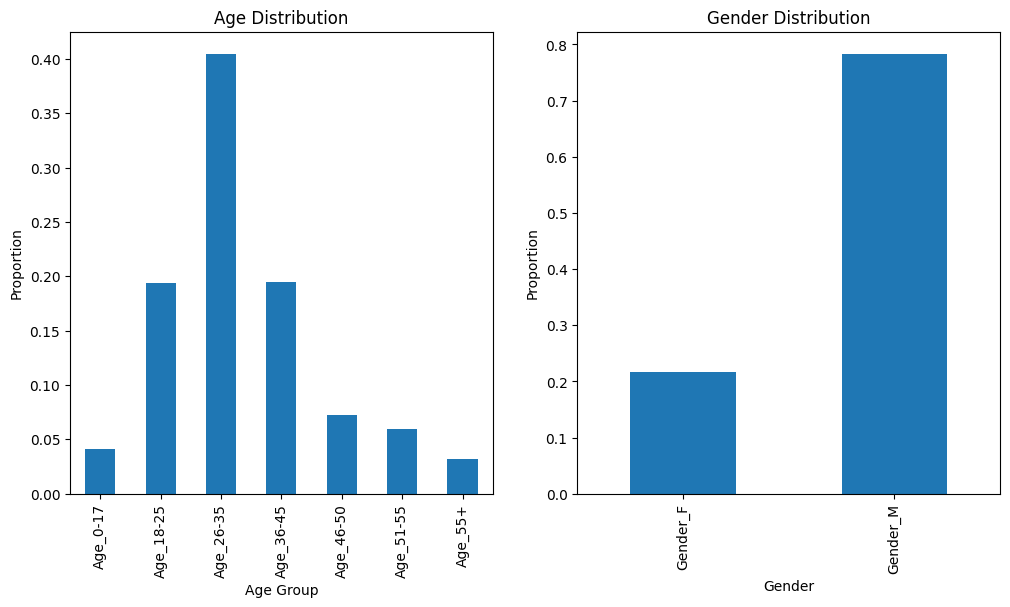

Analysis for Cluster 2:

Gender Distribution:
Gender_F    0.0
Gender_M    1.0
dtype: float64
Conclusion: This cluster is predominantly male.

Age Distribution:
Age_0-17     0.048764
Age_18-25    0.000000
Age_26-35    0.865440
Age_36-45    0.000000
Age_46-50    0.000000
Age_51-55    0.000000
Age_55+      0.085795
dtype: float64
Conclusion: This cluster is predominantly in the 26-35 age group.

Average Occupation Code: 8.513048407210066
Conclusion: This cluster has an average occupation code of 8.513048407210066

City Category Distribution:
City_Category_A    0.313349
City_Category_B    0.398815
City_Category_C    0.287836
dtype: float64
Conclusion: This cluster predominantly belongs to City Category B.

Average Marital Status (0=Single, 1=Married): 0.3905792993991611
Conclusion: This cluster is predominantly single.

Average Purchase Amount: 9123.400889921777
Conclusion: This cluster has an average purchase amount of 9123.400889921777


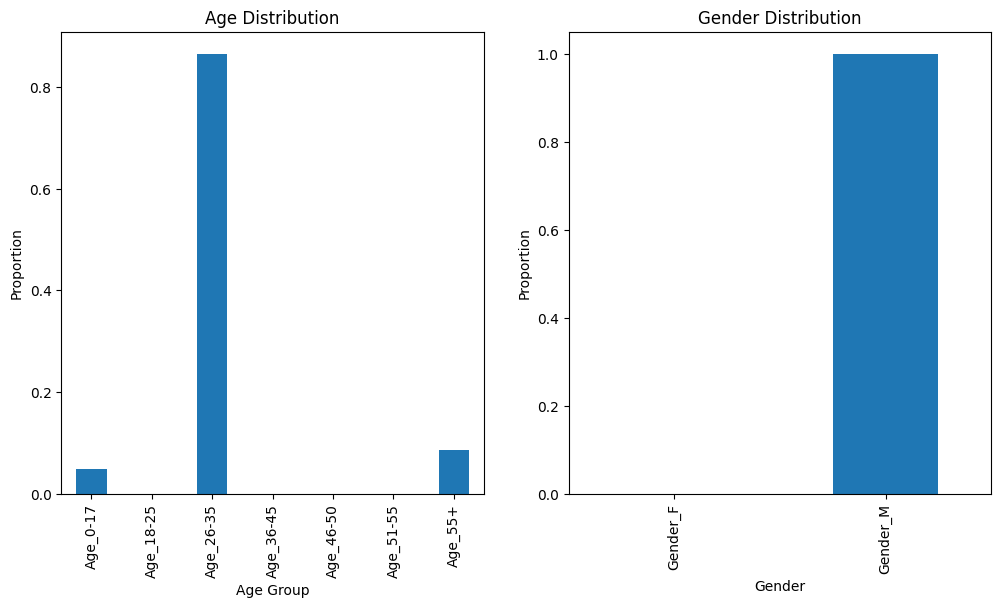

Analysis for Cluster 3:

Gender Distribution:
Gender_F    0.0
Gender_M    1.0
dtype: float64
Conclusion: This cluster is predominantly male.

Age Distribution:
Age_0-17     0.0
Age_18-25    1.0
Age_26-35    0.0
Age_36-45    0.0
Age_46-50    0.0
Age_51-55    0.0
Age_55+      0.0
dtype: float64
Conclusion: This cluster is predominantly in the 18-25 age group.

Average Occupation Code: 6.97587159079163
Conclusion: This cluster has an average occupation code of 6.97587159079163

City Category Distribution:
City_Category_A    0.286972
City_Category_B    0.422867
City_Category_C    0.290161
dtype: float64
Conclusion: This cluster predominantly belongs to City Category B.

Average Marital Status (0=Single, 1=Married): 0.19781160939738043
Conclusion: This cluster is predominantly single.

Average Purchase Amount: 9119.395357422365
Conclusion: This cluster has an average purchase amount of 9119.395357422365


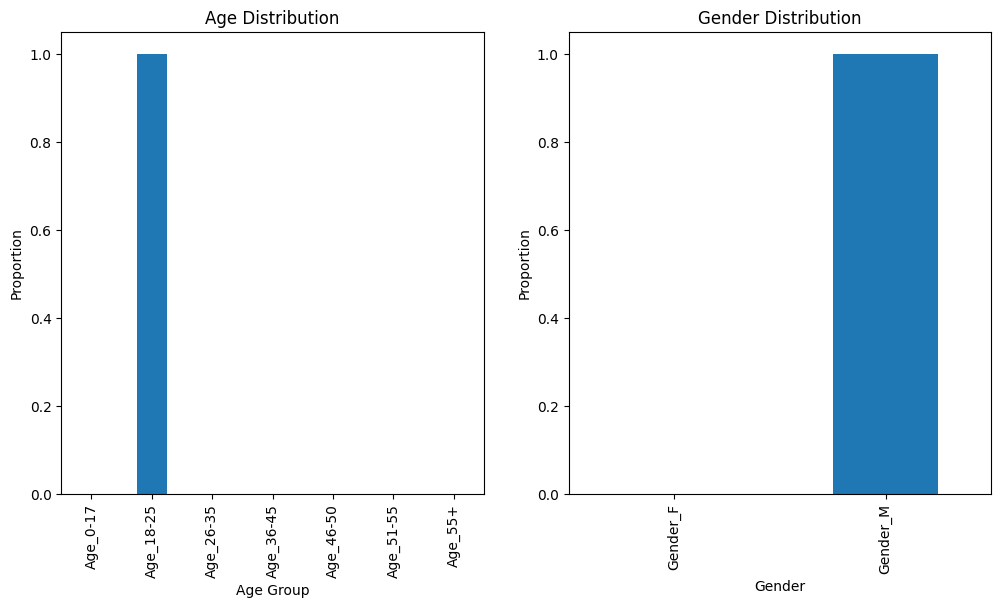

Analysis for Cluster 4:

Gender Distribution:
Gender_F    0.0
Gender_M    1.0
dtype: float64
Conclusion: This cluster is predominantly male.

Age Distribution:
Age_0-17     0.000000
Age_18-25    0.000000
Age_26-35    0.000000
Age_36-45    0.573517
Age_46-50    0.226523
Age_51-55    0.199960
Age_55+      0.000000
dtype: float64
Conclusion: This cluster is predominantly in the 36-45 age group.

Average Occupation Code: 9.314240956342537
Conclusion: This cluster has an average occupation code of 9.314240956342537

City Category Distribution:
City_Category_A    0.211717
City_Category_B    0.445236
City_Category_C    0.343047
dtype: float64
Conclusion: This cluster predominantly belongs to City Category B.

Average Marital Status (0=Single, 1=Married): 0.5394179511942875
Conclusion: This cluster is predominantly married.

Average Purchase Amount: 9219.761210941362
Conclusion: This cluster has an average purchase amount of 9219.761210941362


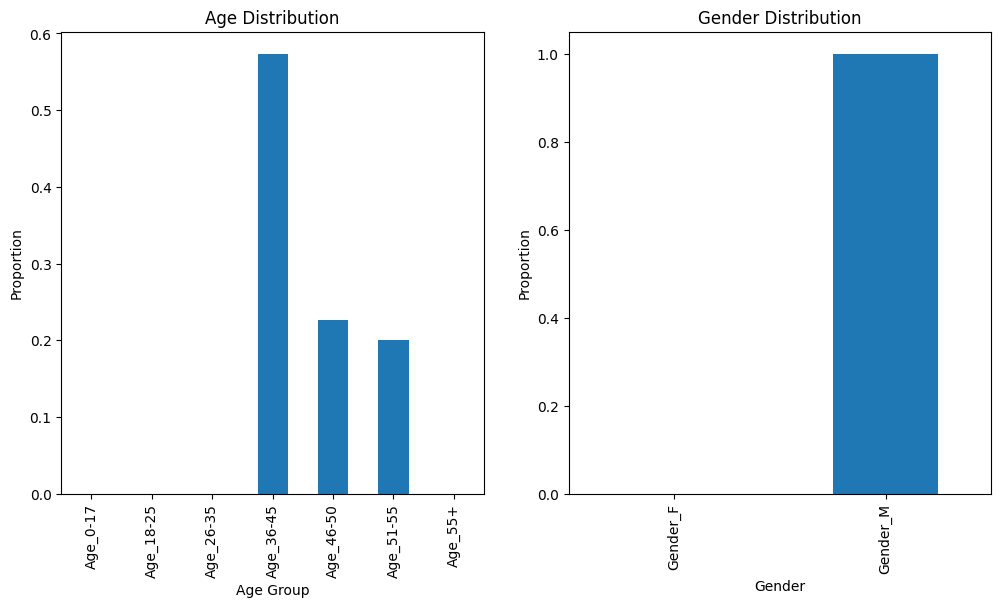

In [ ]:
import matplotlib.pyplot as plt

# Function to analyze and conclude cluster data
def analyze_cluster(df, cluster_id):
    cluster_data = df[df['Cluster'] == cluster_id]

    print(f"Analysis for Cluster {cluster_id}:\n")

    # Gender Distribution
    gender_counts = cluster_data[['Gender_F', 'Gender_M']].mean()
    print("Gender Distribution:")
    print(gender_counts)
    if gender_counts['Gender_F'] > gender_counts['Gender_M']:
        print("Conclusion: This cluster is predominantly female.")
    else:
        print("Conclusion: This cluster is predominantly male.")

    # Age Distribution
    age_columns = ['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']
    age_distribution = cluster_data[age_columns].mean()
    print("\nAge Distribution:")
    print(age_distribution)
    predominant_age_group = age_distribution.idxmax()
    print(f"Conclusion: This cluster is predominantly in the {predominant_age_group.split('_')[1]} age group.")

    # Occupation Distribution
    occupation_avg = cluster_data['Occupation'].mean()
    print("\nAverage Occupation Code:", occupation_avg)
    print("Conclusion: This cluster has an average occupation code of", occupation_avg)

    # City Category
    city_distribution = cluster_data[['City_Category_A', 'City_Category_B', 'City_Category_C']].mean()
    print("\nCity Category Distribution:")
    print(city_distribution)
    predominant_city_category = city_distribution.idxmax()
    print(f"Conclusion: This cluster predominantly belongs to City Category {predominant_city_category.split('_')[2]}.")

    # Marital Status
    marital_status_avg = cluster_data['Marital_Status'].mean()
    print("\nAverage Marital Status (0=Single, 1=Married):", marital_status_avg)
    if marital_status_avg < 0.5:
        print("Conclusion: This cluster is predominantly single.")
    else:
        print("Conclusion: This cluster is predominantly married.")

    # Purchase Analysis
    average_purchase = cluster_data['Purchase'].mean()
    print("\nAverage Purchase Amount:", average_purchase)
    print("Conclusion: This cluster has an average purchase amount of", average_purchase)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    age_distribution.plot(kind='bar')
    plt.title('Age Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Proportion')

    plt.subplot(1, 2, 2)
    gender_counts.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Proportion')
    plt.show()

# Call this function for each cluster
for i in range(5):  # Assuming 5 clusters
    analyze_cluster(df_encoded, i)